In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from autocorrect import Speller
from spellchecker import SpellChecker
import time
from datetime import datetime 
import spacy
from textblob import TextBlob 

from nltk.corpus import words
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance

from nltk.stem import PorterStemmer 
from textblob import Word 
from nltk.stem import WordNetLemmatizer 

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns

start_program = datetime.now() 

In [2]:
ttw = pd.read_csv('ttw2_finalSpell.csv')
ttw.dropna(inplace=True)

In [3]:
#4.1

#first cleaning of data from lab1
#take and return dataframe

def first_cleaning(ttw):
    start_time = datetime.now() 
    stop_words = set(stopwords.words('english'))
    ttw2 = ttw.copy()
    ttw2['tweet'] = ttw2['tweet'].str.lower()
    ttw2['tweet'] = ttw2['tweet'].str.replace(r'(\s)#\w+','') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
    ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    print('Time after first cleaning in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return ttw2


#TOKENIZATION WITH NLTK
#function that take dataframe and return our first dictionary as list data structure

def myDictFunc(ttw):
    dic = set()
    start_time = datetime.now() 
    for i in ttw['tweet']:
        nltk_tokens = nltk.word_tokenize(i)
        for x in nltk_tokens:
            dic.add(x)
    print('Time after dict creation in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return list(dic) 


#4.2




#A graph to know ratio between num of letters per each word
#We use it to see the difference of words lengh beefore and after stemming and lemmatization

def firstGraph(dic):
    start_time = datetime.now() 
    NumOf_Let = []
    NumOfWord = []
    for t in dic:
        NumOf_Let.append(len(t))
        NumOfWord.append(dic.index(t))

    plt.scatter(NumOfWord, NumOf_Let)
    plt.style.use('default')
    plt.xlabel('Word')
    plt.ylabel('Num Of Letters')
    plt.title('Letters per each word in our dictionary')
    plt.show()
    print('Time after first graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    
#Wordcloud
#With this graph we can see amounth of the words
#We use it to see the difference of words amounth before and after stemming and lemmatization

def wordcloudGraph(dic):
    start_time = datetime.now()
# Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=50, background_color="white", collocations=False).generate(" ".join(dic))
# Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Most recent words in our dictionary')
    plt.axis("off")
    plt.show()
    print('Time after wordcloud graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

    
    
#LEMMATIZATION WITH TEXTBLOB

def myLemmatize(dic):
    start_time = datetime.now()  
    dic = [Word(word).lemmatize() for word in dic]
    print('Time after lemmatization in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return dic



#STEMMING WITH NLTK

def myStemm(dic):
    start_time = datetime.now() 
    ps = PorterStemmer() 
    emp = [ps.stem(w) for w in dic]
    print('Time after stemming in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return emp


#3.6
#spellchecker
#spell function for fast spelling operations on our dictionary

def mySpeller(dic):
    start_time = datetime.now() 
    spell = Speller(lang='en')
    words_after_speller = [spell(word) for word in dic[:100]]
    print('Time after spelling dictionary in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    return words_after_speller

In [4]:
ttw_after_first_cleaning = first_cleaning(ttw)

Time after first cleaning in (hh:mm:ss.ms): "0:00:00.195007"


Time after dict creation in (hh:mm:ss.ms): "0:00:03.677967"


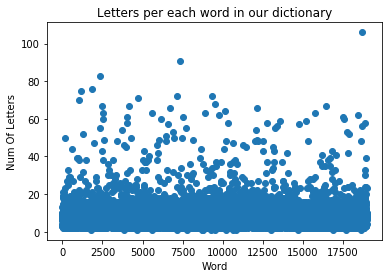

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.322944"


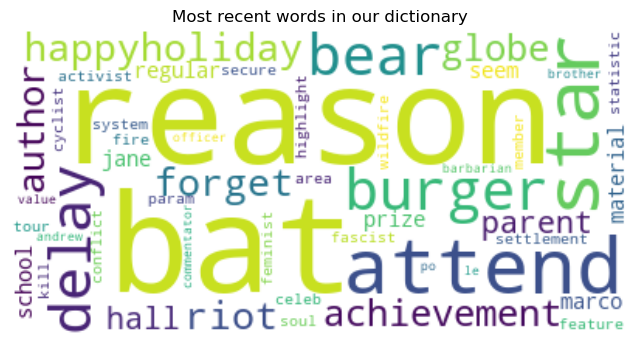

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.604546"
Time after lemmatization in (hh:mm:ss.ms): "0:00:01.892146"


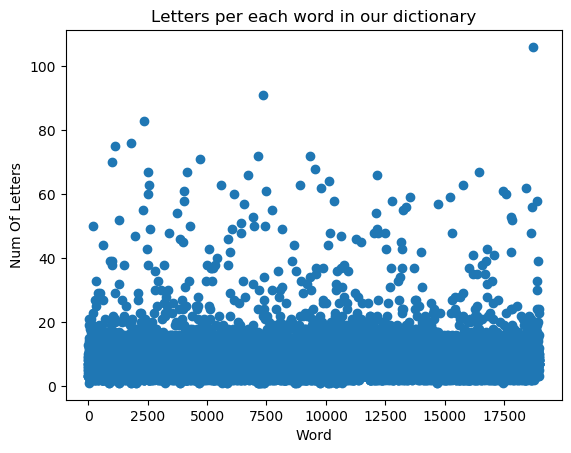

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.029433"


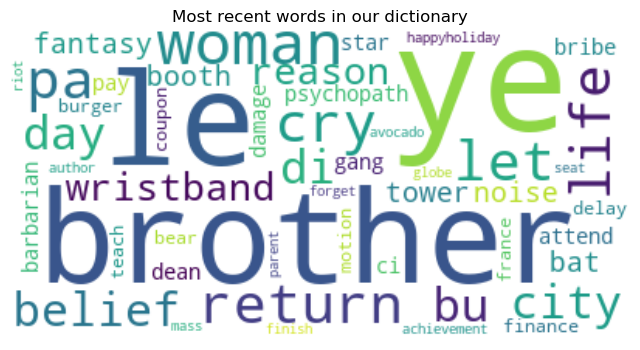

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.552614"
Time after stemming in (hh:mm:ss.ms): "0:00:00.561096"


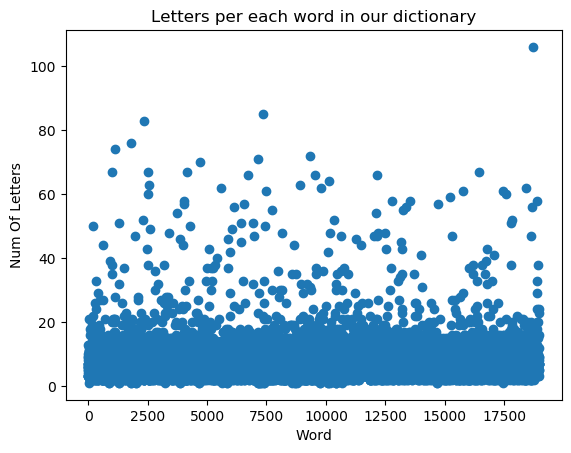

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.135608"


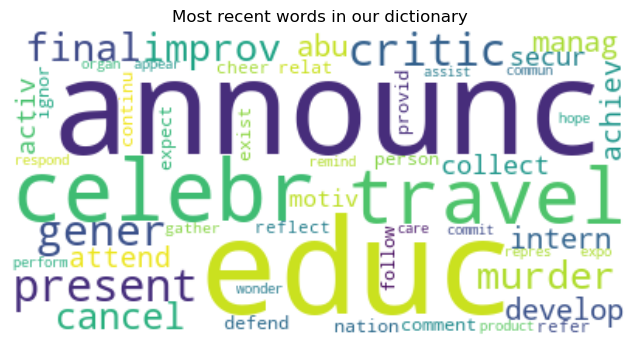

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.573148"
Lenght of second dictionary is:  14289


In [5]:
#First try
#4.1

my_dict = myDictFunc(ttw_after_first_cleaning)
firstGraph(my_dict)
wordcloudGraph(my_dict)

dic_after_lemma = myLemmatize(my_dict)
firstGraph(dic_after_lemma)
wordcloudGraph(dic_after_lemma)

dic_after_stemm = myStemm(dic_after_lemma)
firstGraph(dic_after_stemm)
wordcloudGraph(dic_after_stemm)

#dic_after_spelling = mySpeller(dic_after_stemm)
#firstGraph(dic_after_stemm)
#wordcloudGraph(dic_after_stemm)

firstDict = set(dic_after_stemm)
print('Lenght of second dictionary is: ', len(firstDict))

Time after dict creation in (hh:mm:ss.ms): "0:00:03.602145"


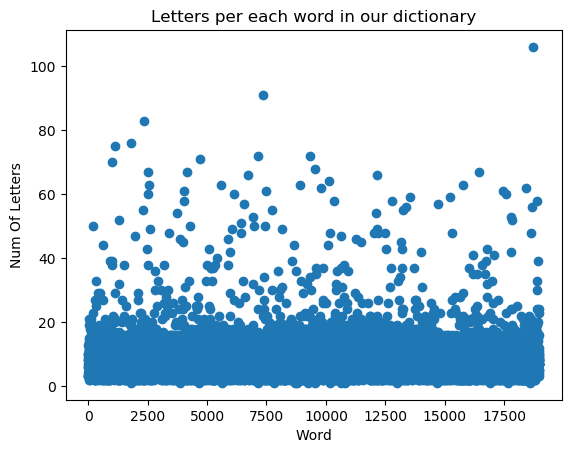

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.380766"


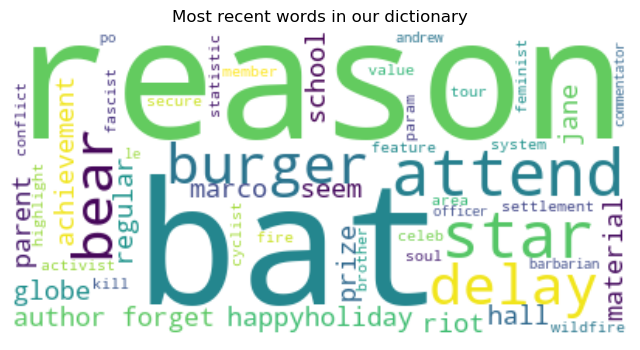

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.586912"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.136975"


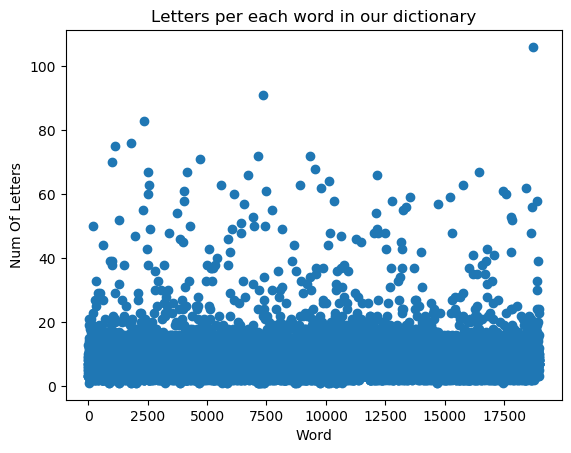

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.063931"


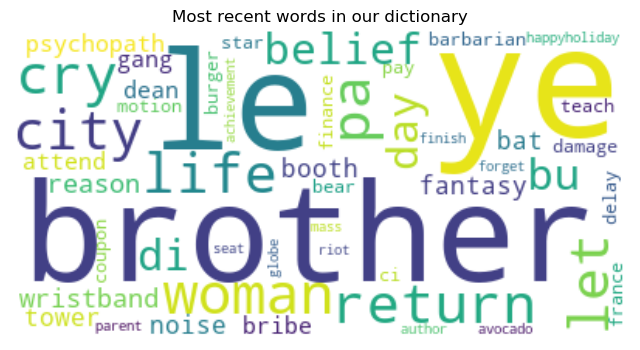

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.592966"
Time after stemming in (hh:mm:ss.ms): "0:00:00.673784"


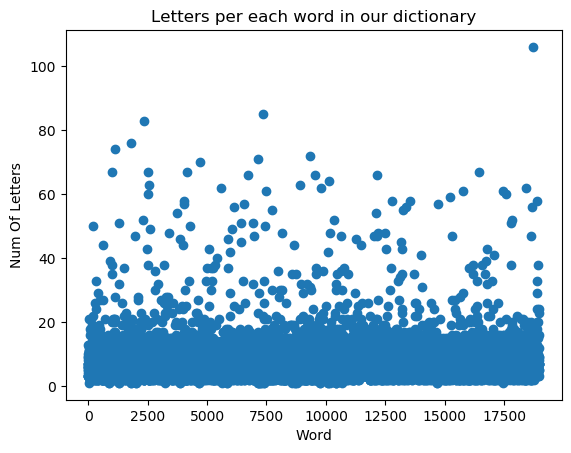

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.699716"


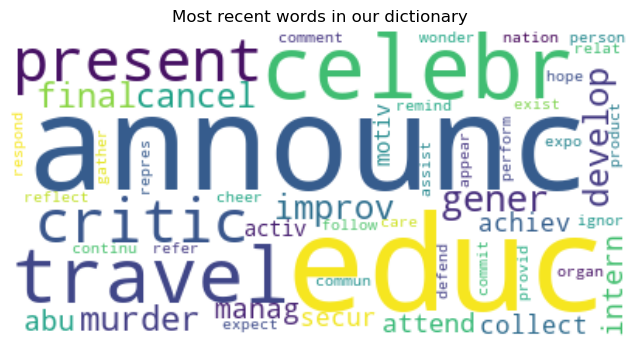

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.560872"
Lenght of second dictionary is:  14289


In [6]:
#Second try


my_dict2 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict2)
wordcloudGraph(my_dict2)

dic_after_lemma2 = myLemmatize(my_dict2)
firstGraph(dic_after_lemma2)
wordcloudGraph(dic_after_lemma2)

# dic_after_spelling2 = mySpeller(dic_after_lemma2)
# firstGraph(dic_after_spelling2)
# wordcloudGraph(dic_after_spelling2)

dic_after_stemm2 = myStemm(dic_after_lemma2)
firstGraph(dic_after_stemm2)
wordcloudGraph(dic_after_stemm2)

secondDict = set(dic_after_stemm2)
print('Lenght of second dictionary is: ', len(secondDict))

Time after dict creation in (hh:mm:ss.ms): "0:00:03.619712"


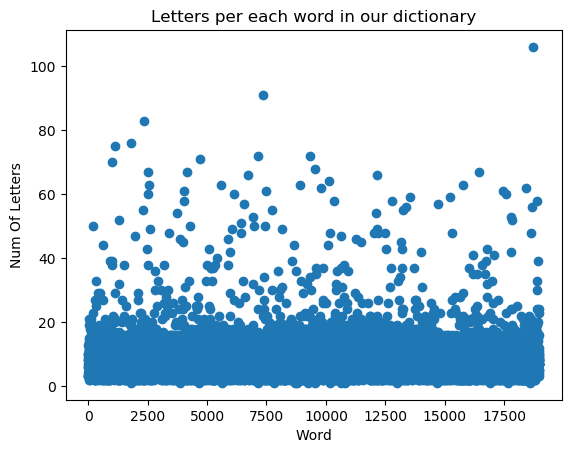

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.367848"


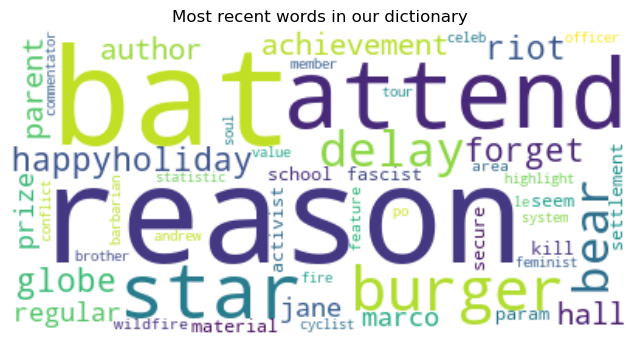

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.590071"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.146263"


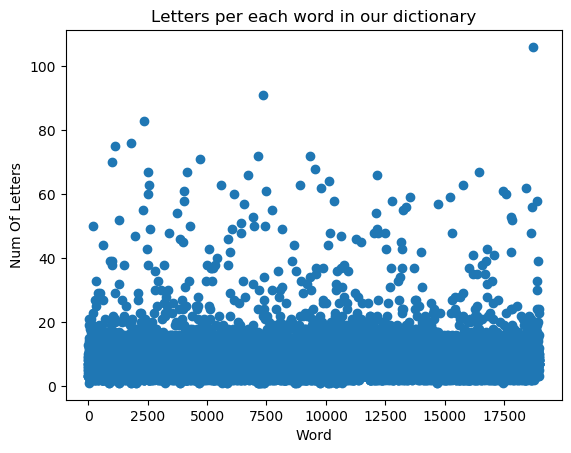

Time after first graph execute in (hh:mm:ss.ms): "0:00:04.067077"


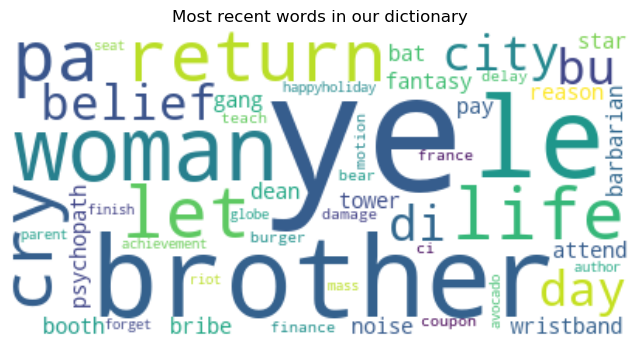

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.542629"
Time after stemming in (hh:mm:ss.ms): "0:00:00.519787"


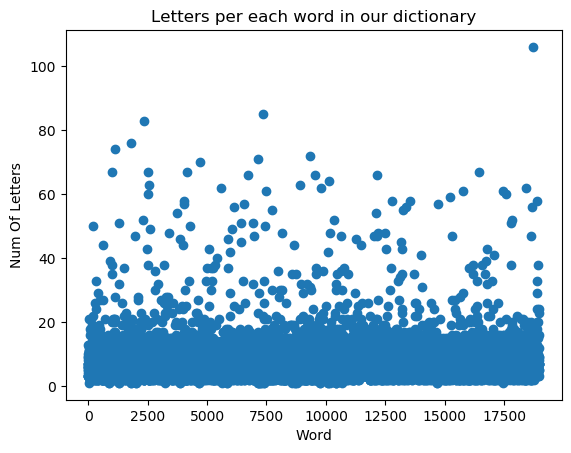

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.157394"


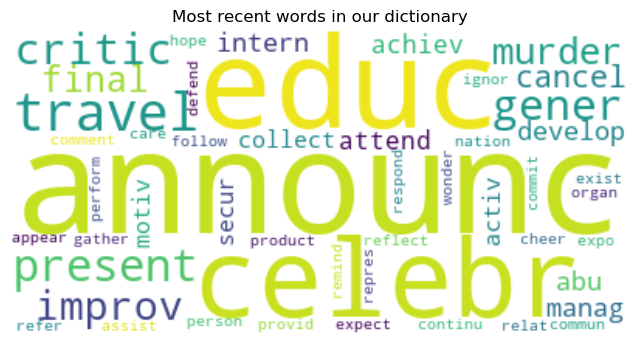

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.558364"
Lenght of third dictionary is:  14289


In [7]:
#Third try



my_dict3 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict3)
wordcloudGraph(my_dict3)

#dic_after_spelling3 = mySpeller(my_dict3)
# firstGraph(dic_after_spelling3)
# wordcloudGraph(dic_after_spelling3)

dic_after_lemma3 = myLemmatize(my_dict3)
firstGraph(dic_after_lemma3)
wordcloudGraph(dic_after_lemma3)

dic_after_stemm3 = myStemm(dic_after_lemma3)
firstGraph(dic_after_stemm3)
wordcloudGraph(dic_after_stemm3)

thirdDict = set(dic_after_stemm3)
print('Lenght of third dictionary is: ', len(thirdDict))

In [8]:
print('Time after whole checkings are done in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_program))

Time after whole checkings are done in (hh:mm:ss.ms): "0:00:55.619863"
